In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
487,2021-05-23,166862062
488,2021-05-24,167316362
489,2021-05-25,167848207
490,2021-05-26,168408716
491,2021-05-27,168966369


In [10]:
latest_date_str = global_df.date.max().strftime("%Y-%m-%d")

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [12]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
#plt.figure(figsize=(9.5,5))
#plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
#plt.legend()

In [14]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [15]:
trans.tail()

,date,count,move_ave7
486,2021-05-23,476075.0,541732.857143
487,2021-05-24,454300.0,529533.714286
488,2021-05-25,531845.0,516628.000000
489,2021-05-26,560509.0,500830.428571
490,2021-05-27,557653.0,540579.000000


<IPython.core.display.Javascript object>


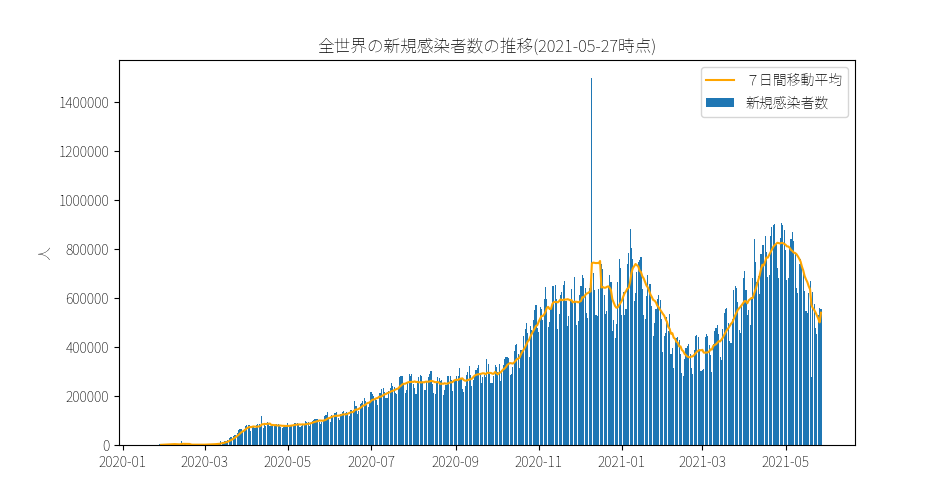

In [18]:
fig=plt.figure(figsize=(9.5,5))
plt.bar(trans["date"],trans["count"],label="新規感染者数")
plt.plot_date(trans["date"],trans["move_ave7"],label="７日間移動平均", fmt="-", color="orange")
plt.title("全世界の新規感染者数の推移({}時点)".format(latest_date_str))
plt.ylabel("人")
plt.legend()

In [19]:
fig.savefig("/tmp/covid-global-transition.png")

## 国別

In [20]:
df.tail()

,Province/State,Country/Region,date,count
135787,NaN,Zimbabwe,2021-05-23,38682
135788,NaN,Zimbabwe,2021-05-24,38696
135789,NaN,Zimbabwe,2021-05-25,38706
135790,NaN,Zimbabwe,2021-05-26,38819
135791,NaN,Zimbabwe,2021-05-27,38854


In [21]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [22]:
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Israel",
    "Korea, South",
    "Taiwan*",
]})
dates = df["date"].unique()

In [23]:
c_df = pd.merge(countries, df, left_on="country", right_on="Country/Region", how="inner")[["country","date","count"]]

In [24]:
c_df

,country,date,count
0,Japan,2020-01-22,2
1,Japan,2020-01-23,2
2,Japan,2020-01-24,2
3,Japan,2020-01-25,2
4,Japan,2020-01-26,4
...,...,...,...
3931,Taiwan*,2021-05-23,4322
3932,Taiwan*,2021-05-24,4917
3933,Taiwan*,2021-05-25,5456
3934,Taiwan*,2021-05-26,6091


In [25]:
c_df.groupby("country").count()

,date,count
country,,
Brazil,492,492
India,492,492
Israel,492,492
Japan,492,492
"Korea, South",492,492
Sweden,492,492
Taiwan*,492,492
US,492,492


In [26]:
len(dates)

492

In [27]:
c_trans = c_df.copy()
c_trans["inc_count"] = 0
for c in countries["country"]:
    yday_t = c_trans.loc[c_trans["country"]==c].reset_index()
    t = yday_t.iloc[1:].reset_index()
    t["inc_count"] = t["count"] - t.join(yday_t,rsuffix="_y")["count_y"]
    c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>=t["date"].min()),"inc_count"] = t["inc_count"].values.tolist()
    c_trans.loc[(c_trans["country"]==c),"move_ave7"] = c_trans.loc[c_trans["country"]==c]["inc_count"].rolling(7).mean()
pd.concat([c_trans.head(2),c_trans.tail(2)])


,country,date,count,inc_count,move_ave7
0,Japan,2020-01-22,2,0,NaN
1,Japan,2020-01-23,2,0,NaN
3934,Taiwan*,2021-05-26,6091,635,508.285714
3935,Taiwan*,2021-05-27,6761,670,562.285714


In [28]:
c_trans[c_trans["country"]=="Japan"].tail()

,country,date,count,inc_count,move_ave7
487,Japan,2021-05-23,719925,4045,4970.000000
488,Japan,2021-05-24,722668,2743,4827.857143
489,Japan,2021-05-25,726586,3918,4644.142857
490,Japan,2021-05-26,731071,4485,4448.571429
491,Japan,2021-05-27,735234,4163,4227.571429


In [29]:
print(any(c_trans["date"].isnull()))
print(any(c_trans["date"].isna()))

False
False


In [30]:
c_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    3936 non-null   object        
 1   date       3936 non-null   datetime64[ns]
 2   count      3936 non-null   int64         
 3   inc_count  3936 non-null   int64         
 4   move_ave7  3888 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 184.5+ KB


<IPython.core.display.Javascript object>


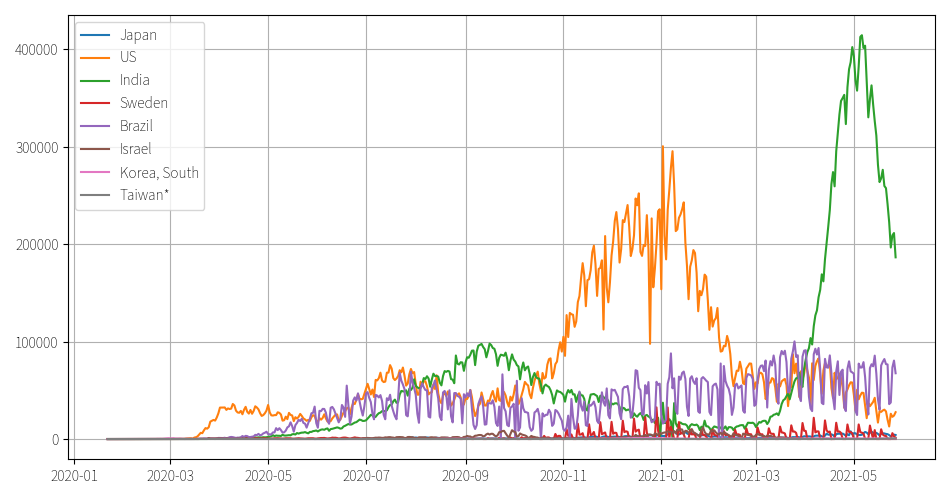

Japan
US
India
Sweden
Brazil
Israel
Korea, South
Taiwan*


In [31]:
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_count"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


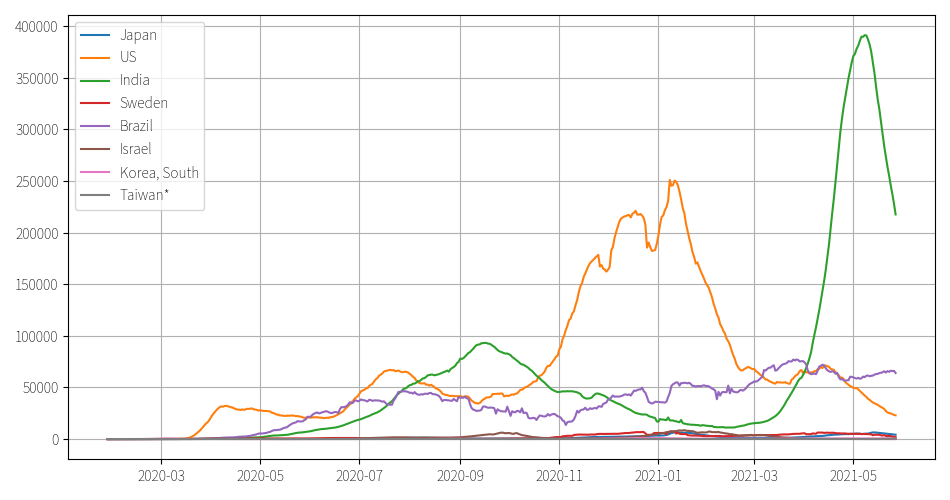

Japan
US
India
Sweden
Brazil
Israel
Korea, South
Taiwan*


In [32]:
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

## 人口当たり

In [33]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


In [34]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [35]:
alternates.head()

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation
2,Iran,Iran (Islamic Republic of)
3,Bolivia,Bolivia (Plurinational State of)
4,Moldova,Republic of Moldova


In [36]:
c_trans_pop = pd.merge(c_trans, alternates, left_on="country", right_on="covid_country", how="left")
#c_trans_pop["country"].replace(renames,inplace=True)
del c_trans_pop["covid_country"]

In [37]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country
0,Japan,2020-01-22,2,0,NaN,NaN
1,Japan,2020-01-23,2,0,NaN,NaN
2,Japan,2020-01-24,2,0,NaN,NaN
3,Japan,2020-01-25,2,0,NaN,NaN
4,Japan,2020-01-26,4,2,NaN,NaN


In [38]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country     True
dtype: bool

In [39]:
c_trans_pop["un_country"].fillna(c_trans_pop["country"],inplace=True)

In [40]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country    False
dtype: bool

In [41]:
c_trans_pop = pd.merge(c_trans_pop, pop_latest, on="un_country", how="left")

In [42]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458


In [43]:
c_trans_pop["count_per_mil_pop"] = c_trans_pop["count"] / (c_trans_pop["population"] / 1000)
c_trans_pop["inc_count_per_mil_pop"] = c_trans_pop["inc_count"] / (c_trans_pop["population"] / 1000)

In [44]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458,0.015813,0.0
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458,0.015813,0.0
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458,0.015813,0.0
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458,0.015813,0.0
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458,0.031626,0.015813


In [45]:
#c_trans_pop["move_ave7_milpop"] = 0
for c in countries["country"]:
    c_trans_pop.loc[(c_trans_pop["country"]==c),"move_ave7_milpop"] = c_trans_pop.loc[c_trans_pop["country"]==c]["count_per_mil_pop"].rolling(7).mean()
    c_trans_pop.loc[(c_trans_pop["country"]==c),"inc_move_ave7_milpop"] = c_trans_pop.loc[c_trans_pop["country"]==c]["inc_count_per_mil_pop"].rolling(7).mean()

In [46]:
c_trans_pop.loc[c_trans_pop["country"]=="Japan"].tail()


,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,move_ave7_milpop,inc_move_ave7_milpop
487,Japan,2021-05-23,719925,4045,4970.000000,Japan,126476.458,5692.166047,31.982237,5574.410649,39.295851
488,Japan,2021-05-24,722668,2743,4827.857143,Japan,126476.458,5713.853878,21.687831,5612.582631,38.171983
489,Japan,2021-05-25,726586,3918,4644.142857,Japan,126476.458,5744.831975,30.978097,5649.302057,36.719425
490,Japan,2021-05-26,731071,4485,4448.571429,Japan,126476.458,5780.29312,35.461145,5684.475175,35.173118
491,Japan,2021-05-27,735234,4163,4227.571429,Japan,126476.458,5813.208336,32.915217,5717.900933,33.425758


<IPython.core.display.Javascript object>


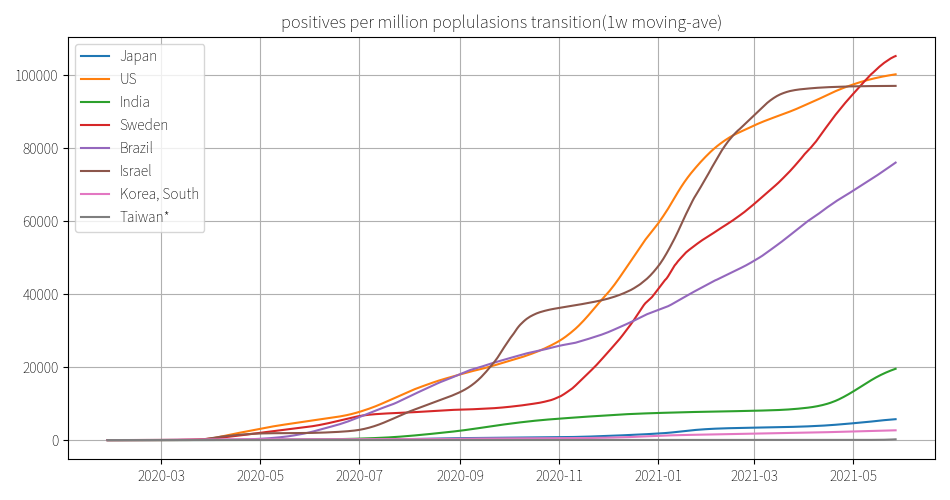

In [47]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans_pop["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[c_trans_pop["country"]==c]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


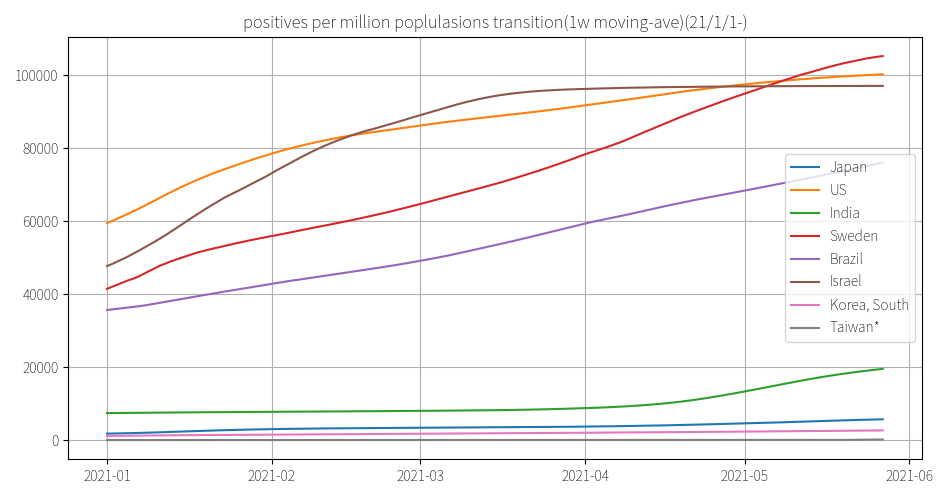

In [48]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans_pop.loc[c_trans_pop["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[(c_trans_pop["country"]==c) & (c_trans_pop["date"]>="2021-01-01")]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

## 人口当たりの新規感染者数

<IPython.core.display.Javascript object>


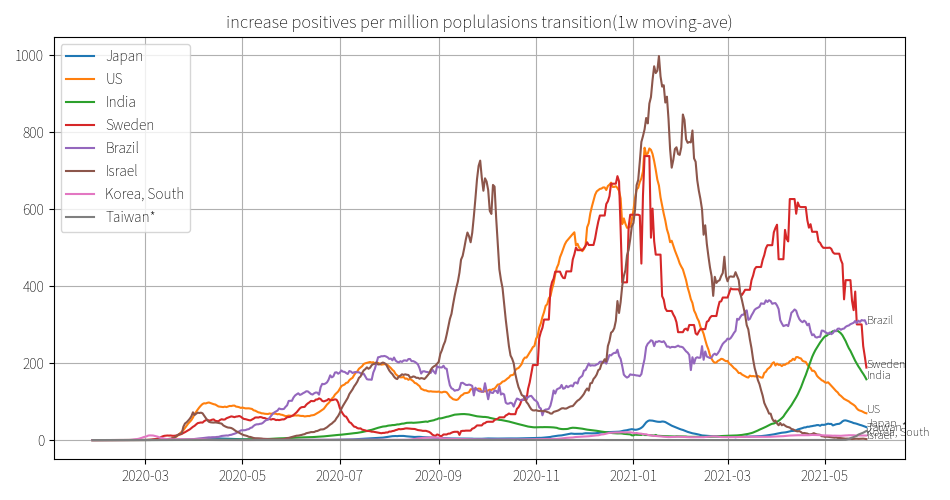

In [49]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("increase positives per million poplulasions transition(1w moving-ave)")
dates = c_trans_pop["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[c_trans_pop["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
    plt.text(dates.max(),c_trans_pop.loc[(c_trans_pop["country"]==c) & (c_trans_pop["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)

plt.legend()
plt.tight_layout()

## 人口100万人当たりの新規感染者数（3月以降）

<IPython.core.display.Javascript object>


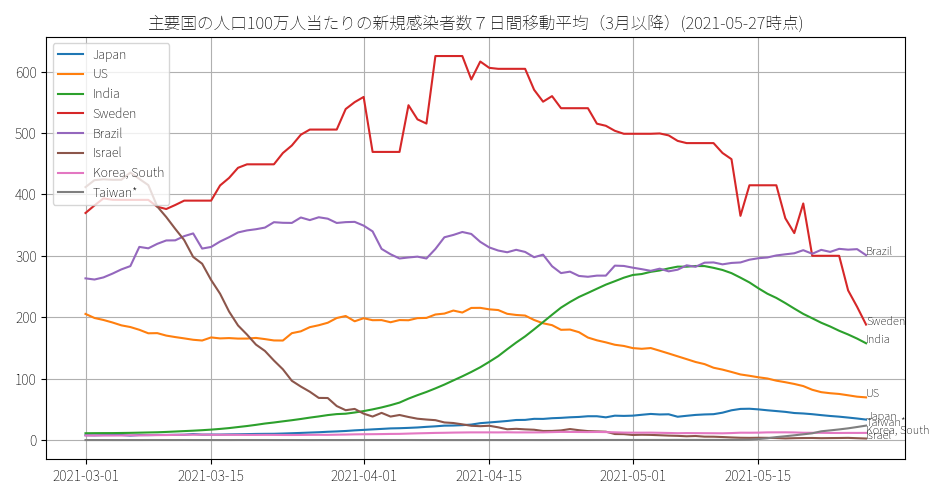

In [50]:
fig=plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("主要国の人口100万人当たりの新規感染者数７日間移動平均（3月以降）({}時点)".format(latest_date_str))
chart_data = c_trans_pop[c_trans_pop.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.tight_layout()

In [51]:
fig.savefig("/tmp/covid-countries-transition.png")